# Import Core Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import pickle

from os import listdir, walk
from os.path import isfile, join

In [2]:
from detect_peaks import detect_peaks
import ruptures as rpt

# Load Dataset

In [3]:
%run load_dataset.ipynb

In [4]:
subj_range = np.hstack((np.arange(1001,1013),np.arange(2002,2003)))

all_subjects = [str(i) for i in subj_range]

In [5]:
print(all_subjects)

['1001', '1002', '1003', '1004', '1005', '1006', '1007', '1008', '1009', '1010', '1011', '1012', '2002']


In [6]:
X_all, y_all, subj_all, ts_all = load_all_data(all_subjects)

Loading 1001's data


/Users/admin/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6701: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Loading 1002's data
Loading 1003's data
Loading 1004's data
Loading 1005's data
Loading 1006's data
Loading 1007's data
Loading 1008's data
Loading 1009's data
Loading 1010's data
Loading 1011's data
Loading 1012's data
Loading 2002's data
Finished loading


# Data Preprocessing

In [7]:
%run preprocessing.ipynb

In [29]:
print(X_all.shape, y_all.shape)

(26742, 3) (26742,)


In [9]:
X_all

array([[-2.99275204e-01, -9.03566837e-01, -6.10765714e-04],
       [-3.04649949e-01, -9.05032653e-01,  4.64181969e-03],
       [-3.01229663e-01, -9.01612347e-01,  2.68736939e-03],
       ...,
       [-8.85488163e-01,  1.68082724e-01,  2.51024714e-01],
       [-9.08941531e-01,  2.15478163e-01,  3.25293837e-01],
       [-9.29463367e-01, -8.44078224e-02,  2.32946041e-01]])

# Group Data by Label and Normalize Data

In [10]:
print(label_list)
print(label_dict)

['sit', 'sleep', 'stand', 'walk']
{'sit': 0, 'sleep': 1, 'stand': 2, 'walk': 3}


In [11]:
new_label_list = [0,1,2,3]
new_label_dict = {
    0: 'sit',
    1: 'sleep',
    2: 'stand',
    3: 'walk'
}

colors = ['r','g','b','navy','turquoise','darkorange']

In [12]:
# group X_all and y_all from load_dataset.ipynb by labels
X_label, y_label = label_grouping(X_all, y_all, subj_all, all_subjects, new_label_list)

# normalize X_label
X_norm = normalize_data(X_label)

## Show Plot for each Activity and Subject

In [13]:
# plot_all_label(X_label, y_all, new_label_list, new_label_dict)

# Calculate Roll, Pitch, Yaw

In [14]:
roll, pitch, yaw = calc_rpy(X_all, colors)
rpy = np.array([roll, pitch, yaw]).transpose()

print(rpy.shape, y_all.shape)

(26742, 3) (26742,)


In [15]:
roll, pitch, yaw = calc_rpy(X_all, colors)
rpy = np.array([roll, pitch, yaw]).transpose()

print(rpy.shape, y_all.shape)

(26742, 3) (26742,)


# Apply PCA

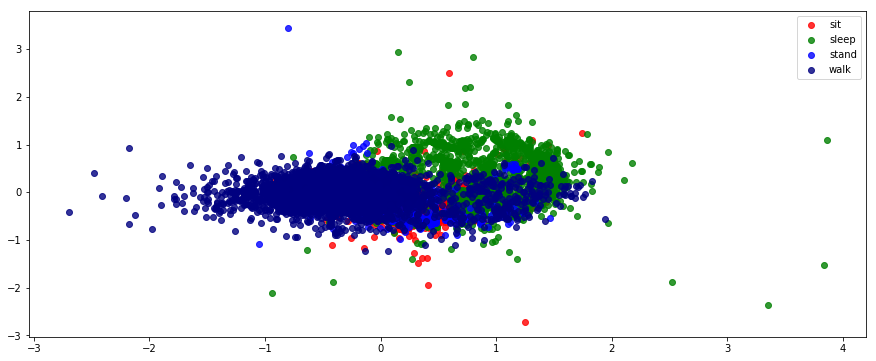

In [16]:
# apply PCA to X_all and rpy
X_pca, pca = apply_pca(X_all, y_all, label_list)
# rpy_pca, pca = apply_pca(rpy, y_all, label_list)

# Reshape Data (Pure Label)

In [17]:
# print(rpy_pca_p.shape, y_all_p.shape, subj_all_p.shape)

In [18]:
# get label-separated X and y
X_pure, y_pure = prepare_pure_label(X_pca, y_all, subj_all, all_subjects, new_label_list)
y_pure = y_pure.reshape((y_pure.shape[0],))

0 0 (315, 60, 3)
0 1 (313, 60, 3)
0 2 (320, 60, 3)
0 3 (321, 60, 3)
0 4 (302, 60, 3)
0 5 (327, 60, 3)
0 6 (314, 60, 3)
0 7 (314, 60, 3)
0 8 (322, 60, 3)
0 9 (315, 60, 3)
0 10 (315, 60, 3)
0 11 (315, 60, 3)
0 12 (315, 60, 3)
1 0 (320, 60, 3)
1 1 (309, 60, 3)
1 2 (308, 60, 3)
1 3 (127, 60, 3)
1 4 (327, 60, 3)
1 5 (332, 60, 3)
1 6 (315, 60, 3)
1 7 (315, 60, 3)
1 8 (315, 60, 3)
1 9 (322, 60, 3)
1 10 (315, 60, 3)
1 11 (315, 60, 3)
1 12 (315, 60, 3)
2 0 (494, 60, 3)
2 1 (501, 60, 3)
2 2 (502, 60, 3)
2 3 (458, 60, 3)
2 4 (518, 60, 3)
2 5 (507, 60, 3)
2 6 (502, 60, 3)
2 7 (501, 60, 3)
2 8 (502, 60, 3)
2 9 (502, 60, 3)
2 10 (501, 60, 3)
2 11 (513, 60, 3)
2 12 (500, 60, 3)
3 0 (800, 60, 3)
3 1 (650, 60, 3)
3 2 (657, 60, 3)
3 3 (682, 60, 3)
3 4 (605, 60, 3)
3 5 (664, 60, 3)
3 6 (651, 60, 3)
3 7 (688, 60, 3)
3 8 (832, 60, 3)
3 9 (644, 60, 3)
3 10 (800, 60, 3)
3 11 (614, 60, 3)
3 12 (843, 60, 3)


In [19]:
print(X_pure.shape, y_pure.shape)

(23674, 180) (23674,)


# Reshape Data (Impure Label)

In [20]:
X_impure, y_impure = prepare_impure_label(X_pca, y_all)

In [21]:
print(X_impure.shape, y_impure.shape)

(26683, 180) (26683,)


# Split Train and Test Set

In [22]:
# Split training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X_pure, y_pure, test_size=0.2, random_state=42)

X_tr, X_te, y_tr, y_te = train_test_split(X_impure, y_impure, test_size=0.2, random_state=42)

print(X_tr.shape)
print(X_te.shape)

(21346, 180)
(5337, 180)


In [23]:
print(X_train.shape)
print(X_test.shape)

(18939, 180)
(4735, 180)


# K-Nearest Neighbors

In [24]:
nn_model = nn_classifier(X_train, y_train, k=1)
print("Finished training")

Finished training


In [25]:
filename = basepath + 'model/knn_model_normal_people.pkl'
pickle.dump(nn_model, open(filename, 'wb'))

In [26]:
y_pred = nn_model.predict(X_test)

In [27]:
nn_model_2 = nn_classifier(X_tr, y_tr, k=1)
print("Finished training")

Finished training


In [30]:
y_pred_2 = nn_model_2.predict(X_te)

## Evaluation

In [32]:
%run eval_score.ipynb

In [33]:
LABELS = ['sit','sleep','stand','walk']

0.8872228088701162


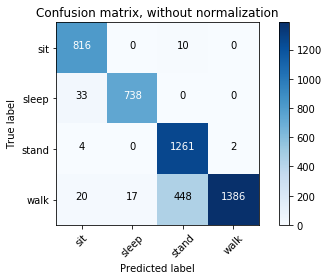

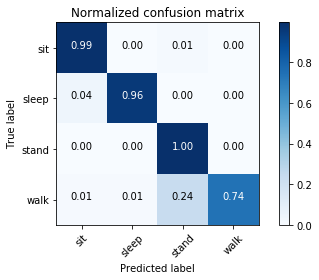

              precision    recall  f1-score   support

         sit       0.93      0.99      0.96       826
       sleep       0.98      0.96      0.97       771
       stand       0.73      1.00      0.84      1267
        walk       1.00      0.74      0.85      1871

   micro avg       0.89      0.89      0.89      4735
   macro avg       0.91      0.92      0.91      4735
weighted avg       0.91      0.89      0.89      4735



In [34]:
acc = accuracy_score(y_test, y_pred)
print(acc)

show_conf_matrix(y_test, y_pred, LABELS)
show_clf_report(y_test, y_pred, LABELS)

# Walk Algorithm

In [36]:
%run classifier_alg.ipynb

In [37]:
X_dict_1 = {
    'id': subj_all,
    'x': [X_i[0] for X_i in X_all],
    'y': [X_i[1] for X_i in X_all],
    'z': [X_i[2] for X_i in X_all],
    'x_pca': [X_i_pca[0] for X_i_pca in X_pca],
    'y_pca': [X_i_pca[1] for X_i_pca in X_pca],
    'z_pca': [X_i_pca[2] for X_i_pca in X_pca],
#     'roll': [rpy_pca_i[0] for rpy_pca_i in rpy_pca],
#     'pitch': [rpy_pca_i[1] for rpy_pca_i in rpy_pca],
#     'yaw': [rpy_pca_i[2] for rpy_pca_i in rpy_pca],
    'label': y_all
}

df_rpy_1 = pd.DataFrame(X_dict_1)

In [38]:
cols = ['x_pca', 'y_pca', 'z_pca']

df_pca_1 = df_rpy_1[cols] # normal_people

In [40]:
xyz_pca = np.array(df_pca_1.to_dict(orient='split')['data'])
dummy_y = np.array([-1 for i in range(len(xyz_pca))])

In [41]:
xyz_pca, y_temp = make_overlapping(xyz_pca, dummy_y)

In [43]:
xyz_pca.shape, df_pca_1.shape

((26683, 60, 3), (26742, 3))

In [44]:
walk_pred = classify_walk_2(xyz_pca)
walk_pred = np.array(walk_pred)

In [45]:
walk_pred

array([0, 0, 0, ..., 3, 3, 3])

In [46]:
walk_pred = np.array(walk_pred)

walk_pred.shape

(26683,)

In [47]:
walk_actual = np.array([3 if (df_rpy_1.loc[i, 'label']==3) else 0 for i in range(len(df_rpy_1))])

walk_actual.shape

(26742,)

In [48]:
print(walk_actual)

[0 0 0 ... 3 3 3]


## Walk Algorithm Evaluation

In [49]:
walk_lbl = ['NaN','walk']

0.8827343252257992


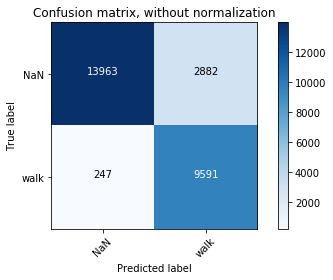

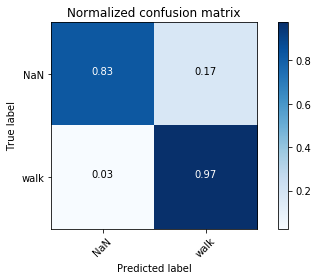

              precision    recall  f1-score   support

         NaN       0.98      0.83      0.90     16845
        walk       0.77      0.97      0.86      9838

   micro avg       0.88      0.88      0.88     26683
   macro avg       0.88      0.90      0.88     26683
weighted avg       0.90      0.88      0.88     26683



In [50]:
acc = accuracy_score(walk_actual[:walk_pred.shape[0]], walk_pred)
print(acc)

show_conf_matrix(walk_actual[:walk_pred.shape[0]], walk_pred, walk_lbl)
show_clf_report(walk_actual[:walk_pred.shape[0]], walk_pred, walk_lbl)

# Combine SVM and Walk Algorithm

In [52]:
X_test_new = get_inverse_X(X_test)

X_test_new

array([[[ 1.4 , -0.16, -0.35],
        [ 1.4 , -0.15, -0.35],
        [ 1.4 , -0.16, -0.36],
        ...,
        [ 1.22, -0.38, -0.22],
        [ 1.22, -0.39, -0.23],
        [ 1.22, -0.38, -0.24]],

       [[-0.34,  0.16, -0.16],
        [-0.3 ,  0.08, -0.21],
        [-0.31,  0.1 , -0.22],
        ...,
        [-0.36,  0.44, -0.11],
        [-0.22,  0.2 , -0.11],
        [-0.33,  0.22, -0.07]],

       [[-0.41,  0.18, -0.17],
        [-0.41,  0.18, -0.17],
        [-0.41,  0.18, -0.18],
        ...,
        [-0.41,  0.19, -0.15],
        [-0.4 ,  0.21, -0.16],
        [-0.41,  0.2 , -0.14]],

       ...,

       [[-0.  , -0.13,  0.31],
        [-0.19,  0.02,  0.26],
        [-0.41,  0.28,  0.3 ],
        ...,
        [ 0.08, -0.3 ,  0.18],
        [ 0.06, -0.27,  0.19],
        [-0.17, -0.33,  0.27]],

       [[-0.37,  0.21,  0.01],
        [-0.62,  0.41,  0.13],
        [-0.62,  0.16,  0.13],
        ...,
        [-0.47,  0.07,  0.13],
        [ 0.1 ,  0.04, -0.11],
        [-0.61,

In [53]:
walk_pred = classify_walk_2(X_test_new)

In [54]:
y_pred_new = combine_2(X_test_new, y_pred)

0.9020063357972545


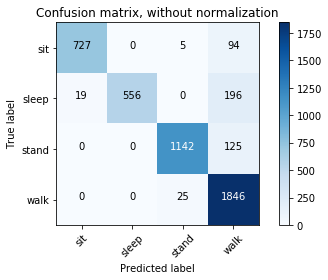

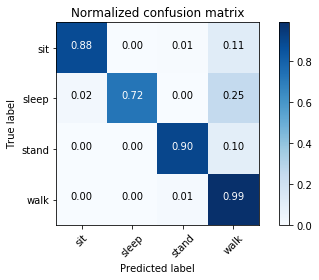

              precision    recall  f1-score   support

         sit       0.97      0.88      0.92       826
       sleep       1.00      0.72      0.84       771
       stand       0.97      0.90      0.94      1267
        walk       0.82      0.99      0.89      1871

   micro avg       0.90      0.90      0.90      4735
   macro avg       0.94      0.87      0.90      4735
weighted avg       0.92      0.90      0.90      4735



In [55]:
acc = accuracy_score(y_test, y_pred_new)
print(acc)

show_conf_matrix(y_test, y_pred_new, LABELS)
show_clf_report(y_test, y_pred_new, LABELS)

# Test Model with Some Subjects

In [56]:
%run test_model.ipynb

In [58]:
filename = basepath + 'model/knn_model_normal_people.pkl'

model = pickle.load(open(filename,'rb'))

Loading 1001's data
Finished prediction


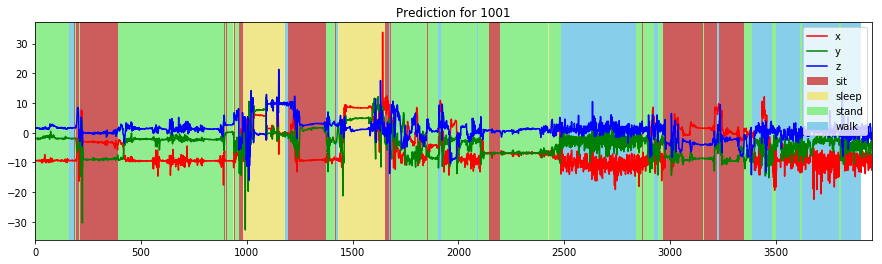

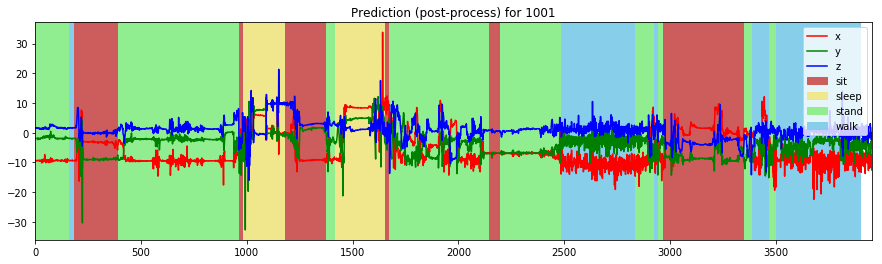

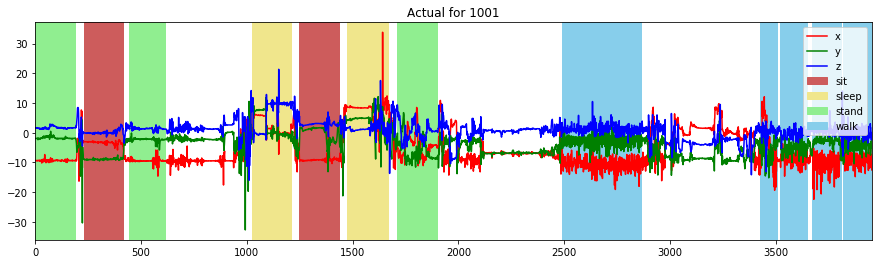

0.8834325396825397


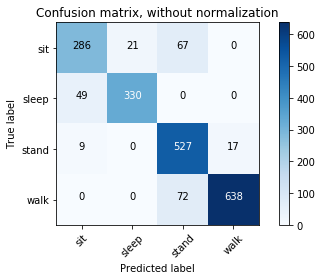

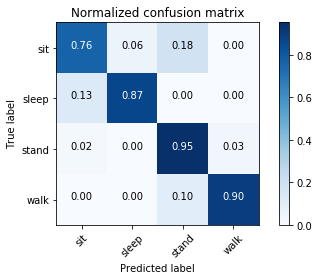

              precision    recall  f1-score   support

         sit       0.83      0.76      0.80       374
       sleep       0.94      0.87      0.90       379
       stand       0.79      0.95      0.86       553
        walk       0.97      0.90      0.93       710

   micro avg       0.88      0.88      0.88      2016
   macro avg       0.88      0.87      0.88      2016
weighted avg       0.89      0.88      0.88      2016

Loading 1002's data
Finished prediction


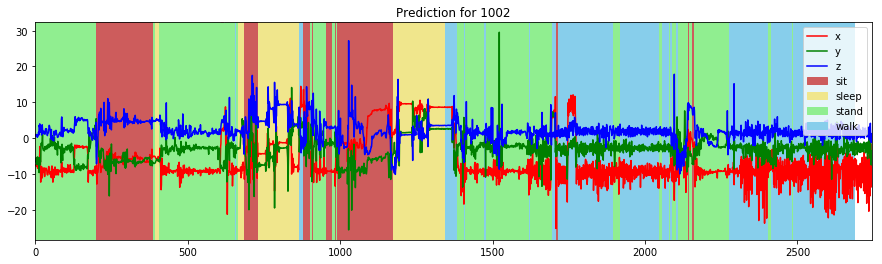

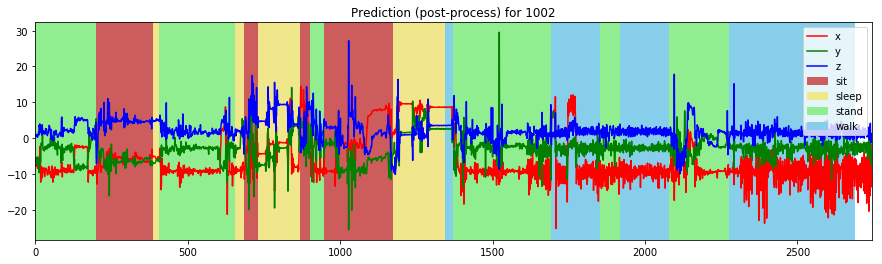

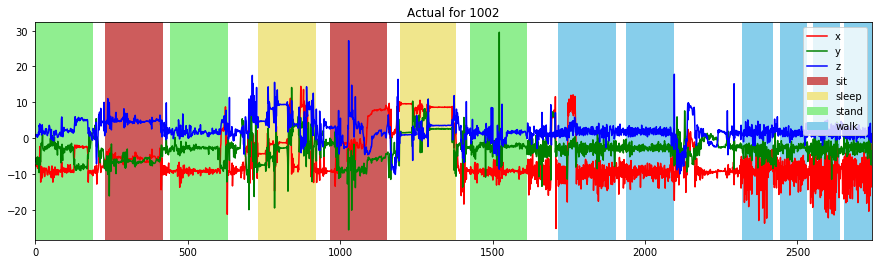

0.9051282051282051


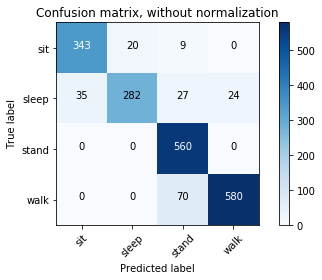

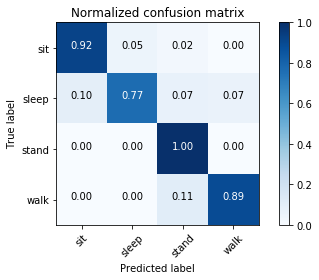

              precision    recall  f1-score   support

         sit       0.91      0.92      0.91       372
       sleep       0.93      0.77      0.84       368
       stand       0.84      1.00      0.91       560
        walk       0.96      0.89      0.93       650

   micro avg       0.91      0.91      0.91      1950
   macro avg       0.91      0.90      0.90      1950
weighted avg       0.91      0.91      0.90      1950

Loading 1003's data
Finished prediction


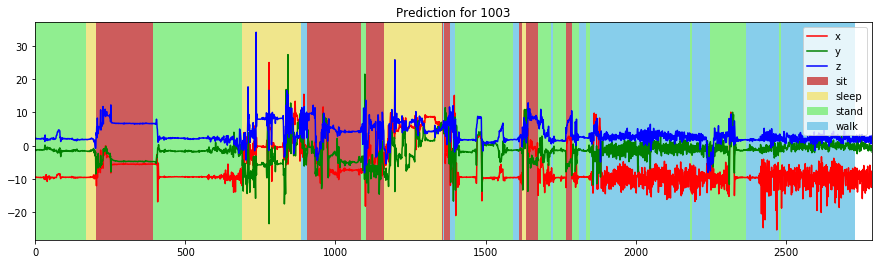

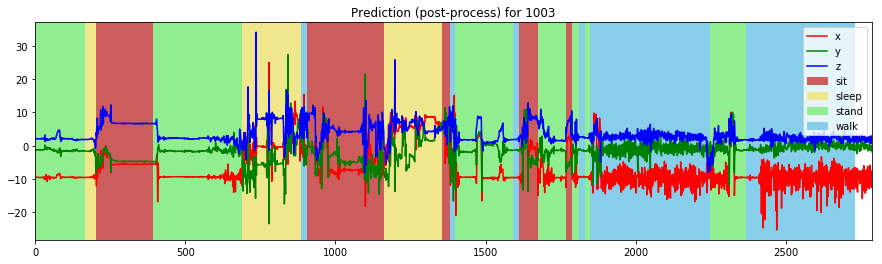

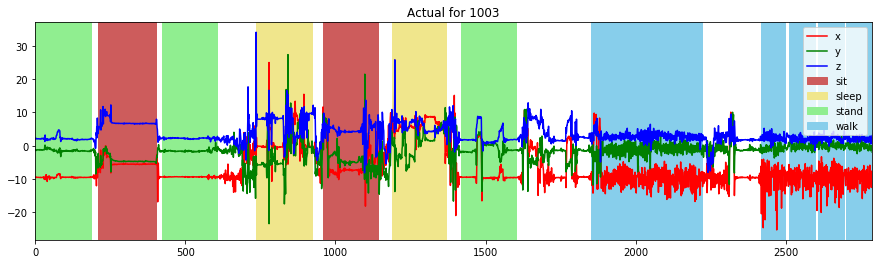

0.9453125


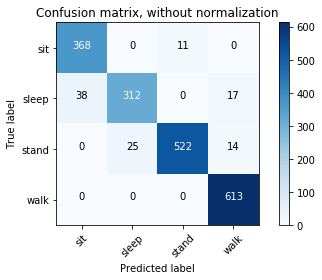

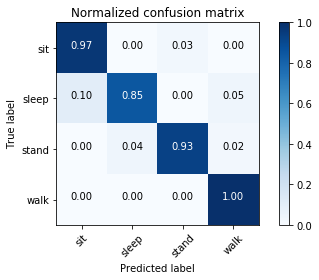

              precision    recall  f1-score   support

         sit       0.91      0.97      0.94       379
       sleep       0.93      0.85      0.89       367
       stand       0.98      0.93      0.95       561
        walk       0.95      1.00      0.98       613

   micro avg       0.95      0.95      0.95      1920
   macro avg       0.94      0.94      0.94      1920
weighted avg       0.95      0.95      0.94      1920

Loading 1004's data
Finished prediction


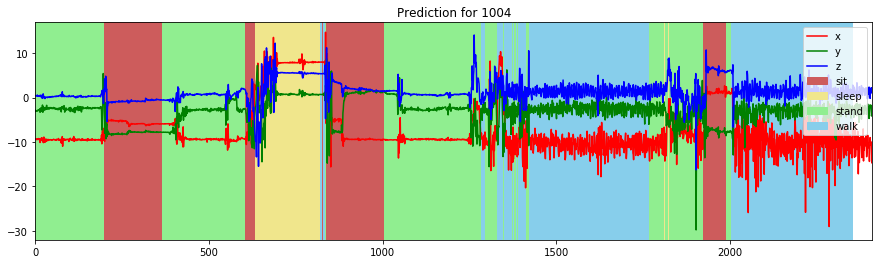

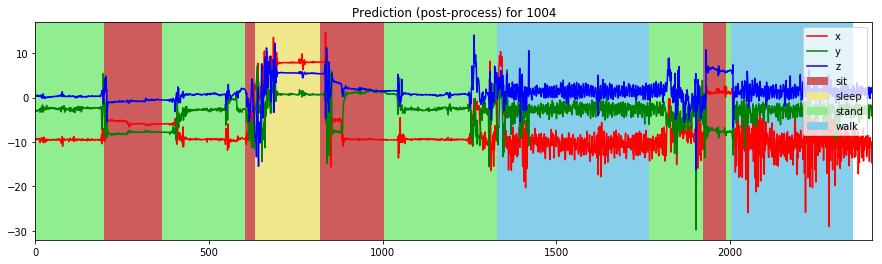

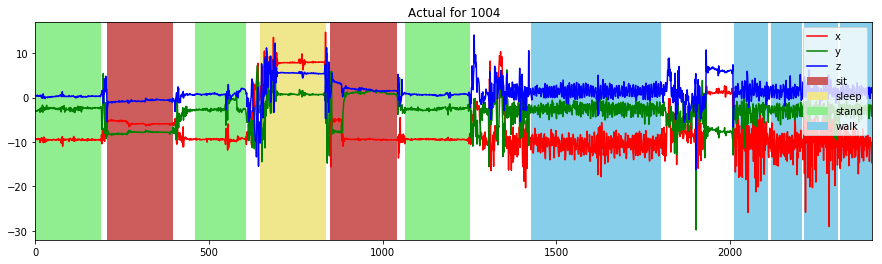

0.9315304948216341


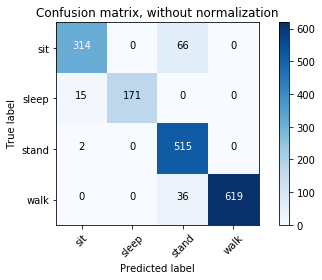

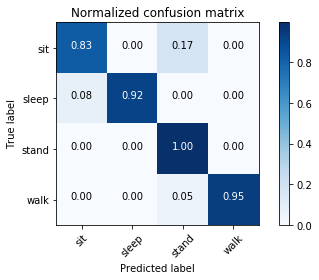

              precision    recall  f1-score   support

         sit       0.95      0.83      0.88       380
       sleep       1.00      0.92      0.96       186
       stand       0.83      1.00      0.91       517
        walk       1.00      0.95      0.97       655

   micro avg       0.93      0.93      0.93      1738
   macro avg       0.95      0.92      0.93      1738
weighted avg       0.94      0.93      0.93      1738

Loading 1005's data
Finished prediction


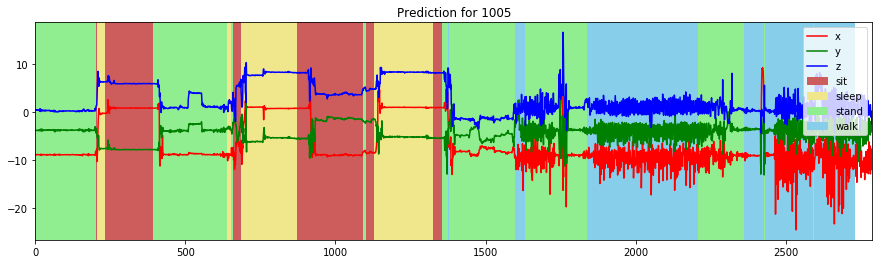

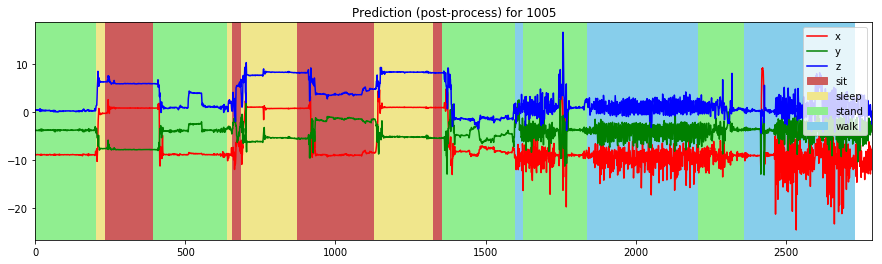

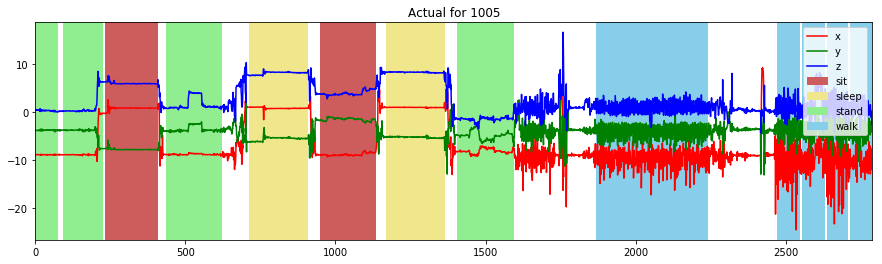

0.9200841219768665


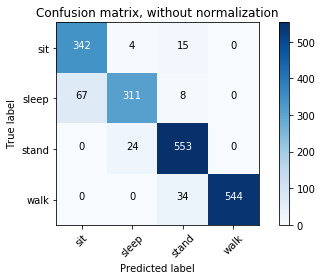

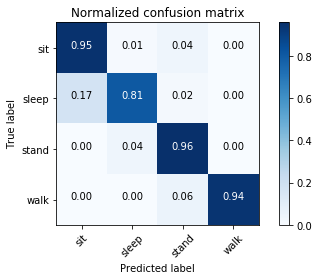

              precision    recall  f1-score   support

         sit       0.84      0.95      0.89       361
       sleep       0.92      0.81      0.86       386
       stand       0.91      0.96      0.93       577
        walk       1.00      0.94      0.97       578

   micro avg       0.92      0.92      0.92      1902
   macro avg       0.92      0.91      0.91      1902
weighted avg       0.92      0.92      0.92      1902

Loading 1006's data
Finished prediction


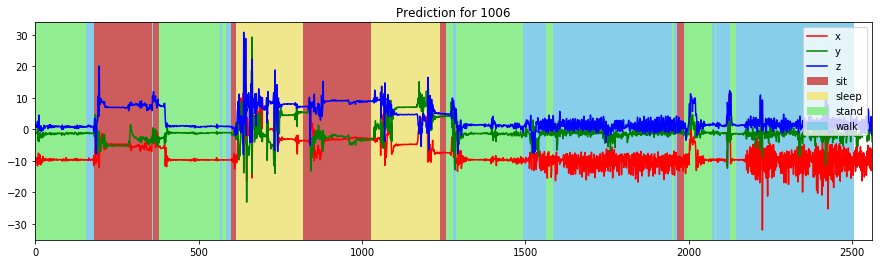

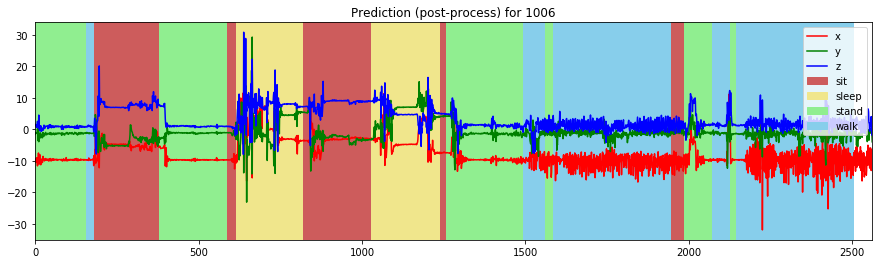

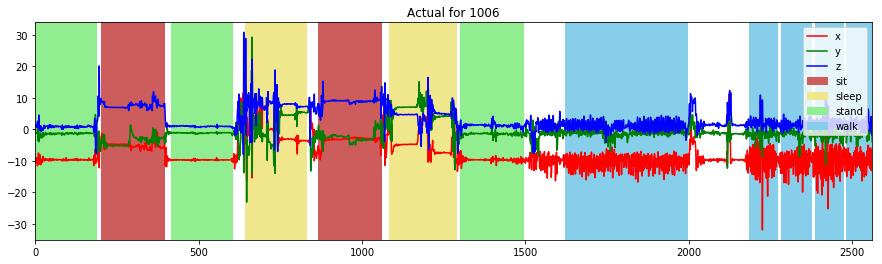

0.8928749377179871


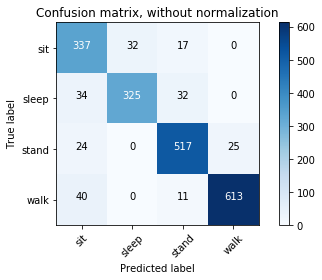

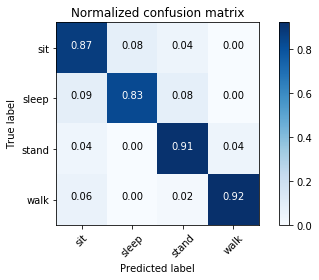

              precision    recall  f1-score   support

         sit       0.77      0.87      0.82       386
       sleep       0.91      0.83      0.87       391
       stand       0.90      0.91      0.90       566
        walk       0.96      0.92      0.94       664

   micro avg       0.89      0.89      0.89      2007
   macro avg       0.89      0.89      0.88      2007
weighted avg       0.90      0.89      0.89      2007

Loading 1007's data
Finished prediction


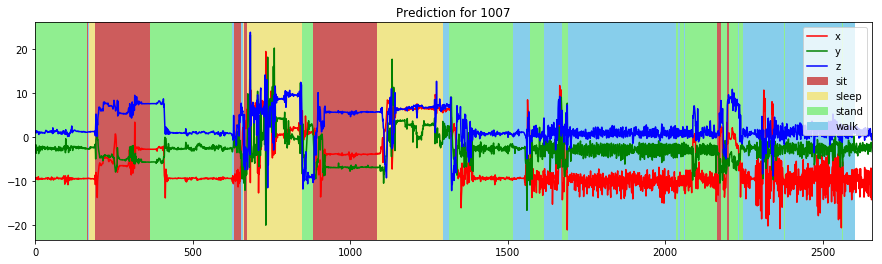

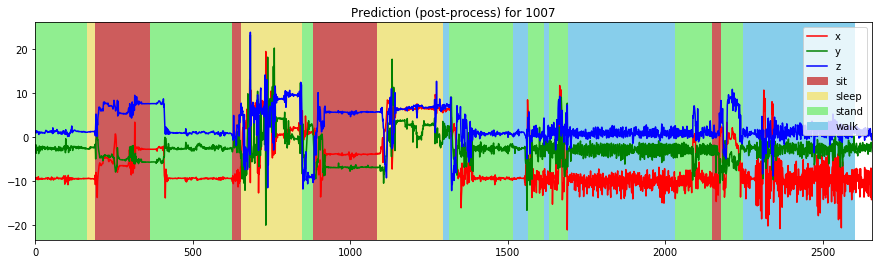

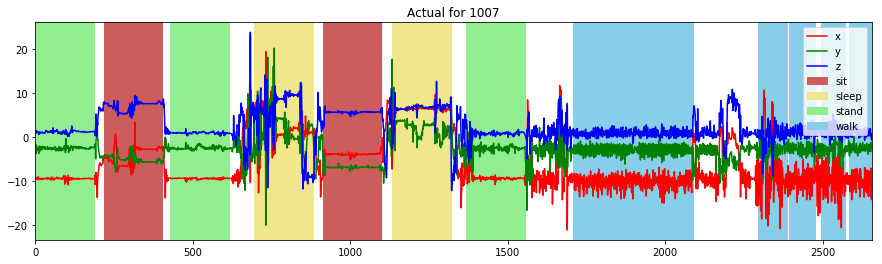

0.8769780500255232


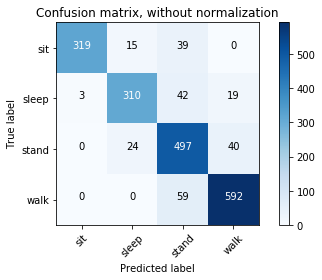

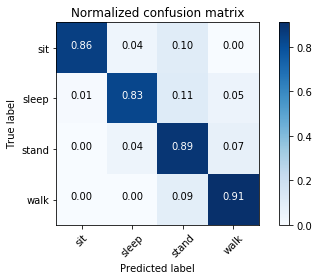

              precision    recall  f1-score   support

         sit       0.99      0.86      0.92       373
       sleep       0.89      0.83      0.86       374
       stand       0.78      0.89      0.83       561
        walk       0.91      0.91      0.91       651

   micro avg       0.88      0.88      0.88      1959
   macro avg       0.89      0.87      0.88      1959
weighted avg       0.88      0.88      0.88      1959

Loading 1008's data
Finished prediction


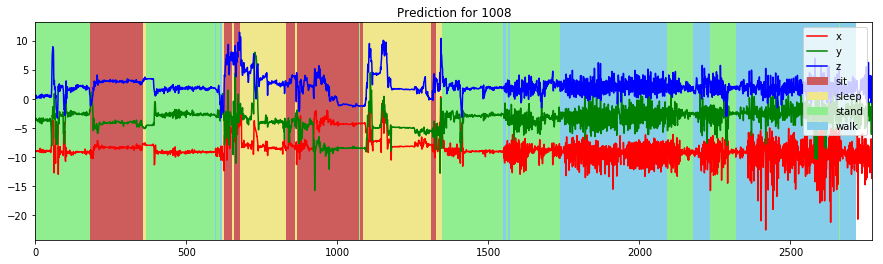

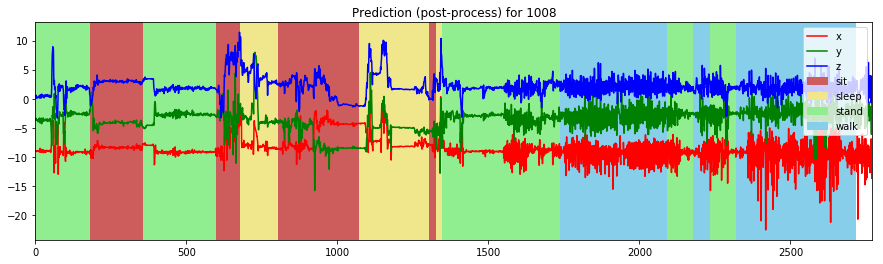

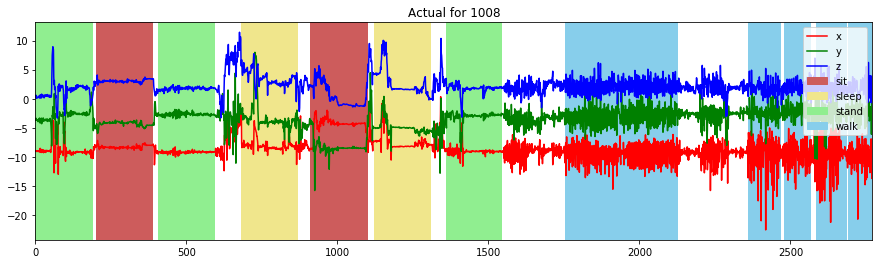

0.9110191412312467


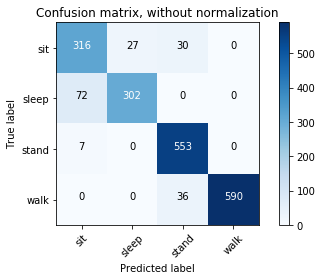

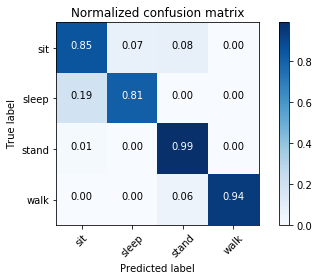

              precision    recall  f1-score   support

         sit       0.80      0.85      0.82       373
       sleep       0.92      0.81      0.86       374
       stand       0.89      0.99      0.94       560
        walk       1.00      0.94      0.97       626

   micro avg       0.91      0.91      0.91      1933
   macro avg       0.90      0.90      0.90      1933
weighted avg       0.91      0.91      0.91      1933

Loading 2001's data
Finished prediction


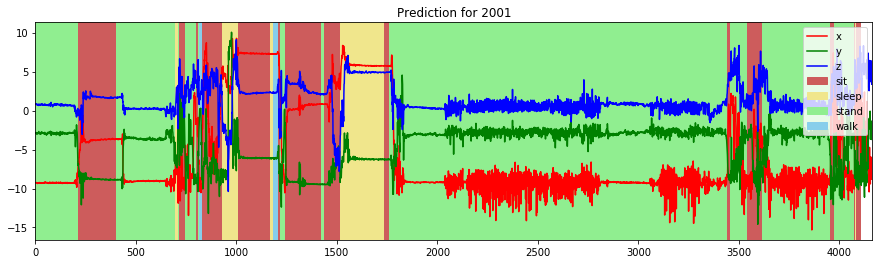

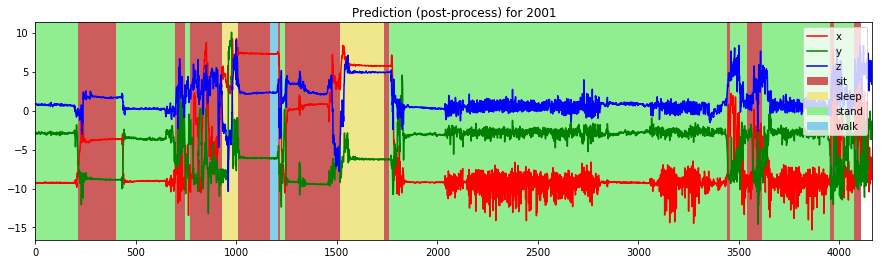

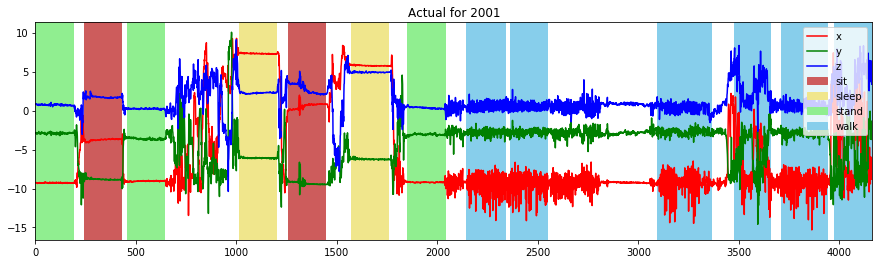

0.42788461538461536


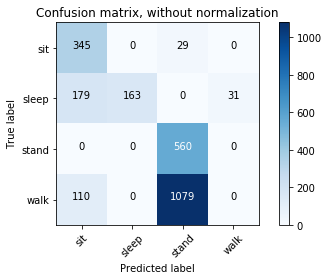

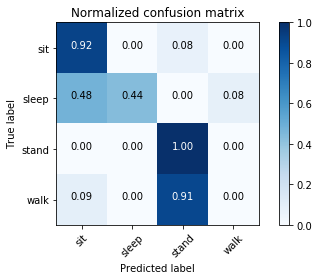

              precision    recall  f1-score   support

         sit       0.54      0.92      0.68       374
       sleep       1.00      0.44      0.61       373
       stand       0.34      1.00      0.50       560
        walk       0.00      0.00      0.00      1189

   micro avg       0.43      0.43      0.43      2496
   macro avg       0.47      0.59      0.45      2496
weighted avg       0.31      0.43      0.31      2496

Loading 2002's data
Finished prediction


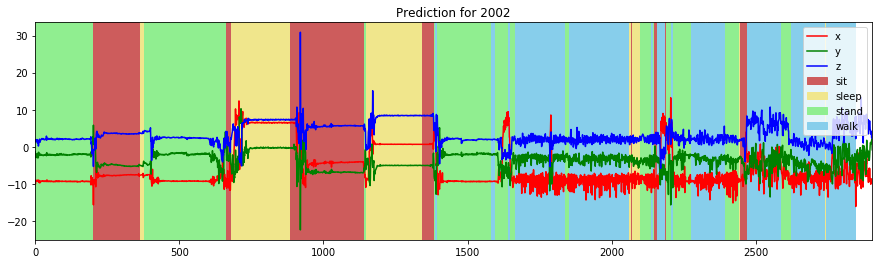

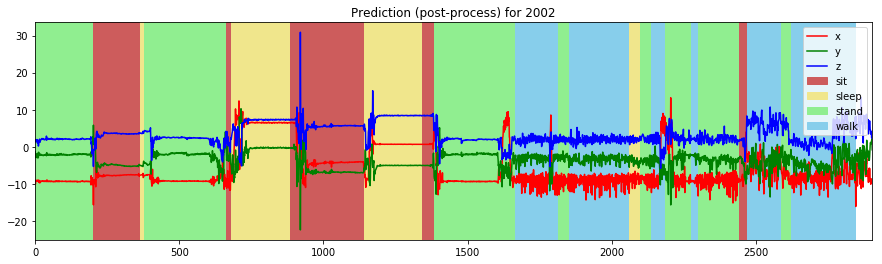

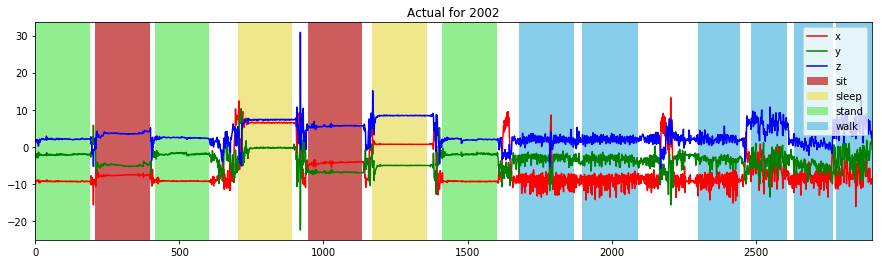

0.8581661891117478


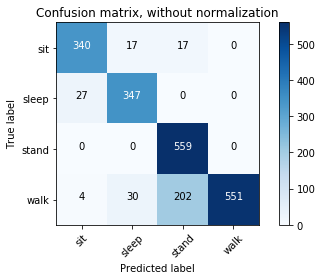

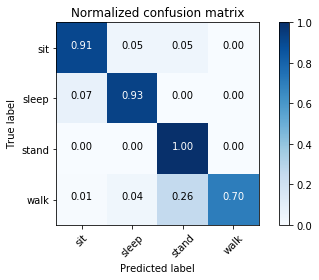

              precision    recall  f1-score   support

         sit       0.92      0.91      0.91       374
       sleep       0.88      0.93      0.90       374
       stand       0.72      1.00      0.84       559
        walk       1.00      0.70      0.82       787

   micro avg       0.86      0.86      0.86      2094
   macro avg       0.88      0.88      0.87      2094
weighted avg       0.89      0.86      0.86      2094



,timestamp,y_pred,y_actual
0,2019-01-14 14:52:40.515,2,2
1,2019-01-14 14:52:40.677,2,2
2,2019-01-14 14:52:40.837,2,2
3,2019-01-14 14:52:40.997,2,2
4,2019-01-14 14:52:41.159,2,2
5,2019-01-14 14:52:41.319,2,2
6,2019-01-14 14:52:41.479,2,2
7,2019-01-14 14:52:41.64,2,2
8,2019-01-14 14:52:41.802,2,2
9,2019-01-14 14:52:41.962,2,2


In [59]:
all_subjects = [str(i) for i in range(1001,1009)]
all_subjects.append('2001')
all_subjects.append('2002')

call_functions(all_subjects, pca)

In [ ]:
s = '3004'
df_sid = load_actual_timer(s)
df_test = load_data(s, df_sid)

X_vis_imp, ts_list_imp = preprocess_data(df_test, pca_p)
X_vis_imp = pd.DataFrame(X_vis_imp)

df_y = predict_combine(X_vis_imp, ts_list_imp)

df_test, df_y = prepare_actual_lb(df_test, df_y, df_sid)

actual_periods = get_actual_periods(df_test)
pred_periods = get_predicted_periods(df_y)
pp_all_run = postprocess_predicted(pred_periods, df_y)

df_y['y_pred'] = pd.Series(pp_all_run)
pp_periods = get_predicted_periods(df_y)
plot_highlighted(s, df_test, pred_periods, pp_periods, actual_periods)

evaluate(df_y)

In [ ]:
cols = ['x','y','z']
df_test[cols]

In [ ]:
LABELS = ['sit', 'sleep', 'stand', 'walk']

df_y_notnull = df_y.dropna()
df_y_notnull = df_y_notnull.reset_index(drop=True)

actual_y = list(df_y_notnull['y_actual'])
pred_y = list(df_y_notnull['y_pred'])

last = len(pred_y)

for i in range(len(pred_y)):
    if(pred_y[i]==-1):
        last = i
        break

pred_y = pred_y[:last]
actual_y = actual_y[:last]

acc = accuracy_score(actual_y, pred_y)
print(acc)

show_conf_matrix(actual_y, pred_y, LABELS)
# show_clf_report(actual_y, pred_y, LABELS)

labels_list = [0,1,2,3]
report = classification_report(actual_y, pred_y, labels_list, output_dict=True)
print(report['macro avg'])

In [ ]:
df_test['x'][2200:].plot()

plt.show()

# Display Table

In [ ]:
from prettytable import PrettyTable

In [ ]:
print(s)
print(df_y)

In [ ]:
label_period = []
period_list = [[] for i in range(len(LABELS))]

first = 0
keep = 0

for i in range(len(df_y)):
    if(calc_sec(df_y.loc[i]['timestamp'].split(' ')[1])>=calc_sec(df_sid.loc[0]['timestamp'].split(' ')[1]) and
       calc_sec(df_y.loc[i]['timestamp'].split(' ')[1])<=calc_sec(df_sid.loc[len(df_sid)-1]['timestamp'].split(' ')[1])):
        
        keep_lb = df_y.loc[keep]['y_pred']

        if(keep_lb!=df_y.loc[i]['y_pred']):
            label_period.append([df_y.loc[keep]['timestamp'], df_y.loc[i-1]['timestamp'], 
                                 df_y.loc[i-1]['y_pred']])

            period_list[df_y.loc[i-1]['y_pred']].append([df_y.loc[keep]['timestamp'], df_y.loc[i-1]['timestamp']])

            keep = i

In [ ]:
labels_list = ['sit', 'sleep', 'stand', 'walk']
headers = ['start', 'end', 'pred']

t = PrettyTable(headers)

for row in label_period:
#     if(calc_sec(row[1].split(' ')[1])-calc_sec(row[0].split(' ')[1])>1):
    t.add_row([row[0], row[1], labels_list[row[2]]])

In [ ]:
print(t)

In [ ]:
print(len(label_period))

label_cnt_list = [0 for i in range(len(labels_list))]
for lb_p in label_period:
    label_i = lb_p[2]
    
    label_cnt_list[label_i] += 1

activity_changes = []
for i in range(len(labels_list)):
    activity_changes.append([labels_list[i], label_cnt_list[i]])
    
print(activity_changes)

In [ ]:
headers = ['Label', 'Activities Count']
tabl_act_chng = PrettyTable(headers)

for ac in activity_changes:
    tabl_act_chng.add_row([ac[0], ac[1]])
    
tabl_act_chng.add_row(['', ''])
tabl_act_chng.add_row(['total changes', len(label_period)])

In [ ]:
print(tabl_act_chng)

## Active Inactive AC (ALL)

In [ ]:
headers = ['Label', 'Activities Count']
tabl_act = PrettyTable(headers)
inactive_table = []
active_table = []

sum = 0
sum_2 = 0
for ac in activity_changes:
    if(ac[0] == 'sit' or ac[0] == 'sleep'):
        sum += ac[1]
    else :
        sum_2 += ac[1]

tabl_act.add_row(['Inactive', sum])
tabl_act.add_row(['Active', sum_2])

In [ ]:
print(tabl_act)

# Convert Time to String Method

In [ ]:
def convert_time_to_string(sec):
    minute = math.floor(sec/60)
    sec = int(sec%60)

    time_string = str(minute) + ':' + str(sec)
    if(sec<10):
        time_string = str(minute) + ':0' + str(sec)
    
    return time_string

# Predicted Duration

In [ ]:
total_secs = []
for i in range(len(period_list)):    
    secs = 0
    for p_i in period_list[i]:
        sec = calc_sec(p_i[1].split(' ')[1]) - calc_sec(p_i[0].split(' ')[1])
        secs += sec
    
    secs = round(secs, 3)
    total_secs.append(secs)
    
percent_secs = [round(t/np.sum(total_secs)*100, 3) for t in total_secs]

tb = PrettyTable(['Label', 'Minutes', 'Percentage', 'Activity Count'])

for i in range(len(LABELS)):
    tb.add_row([labels_list[i], convert_time_to_string(total_secs[i]), percent_secs[i], label_cnt_list[i]])

tb.add_row(['', '', '',''])
tb.add_row(['total', convert_time_to_string(round(np.sum(total_secs), 3)), 
            round(np.sum(percent_secs), 3), len(label_period)])

# Actual Duration

In [ ]:
df_lb = df_sid.groupby('label')

dura_dict = {}
for lb in labels_list:
    dura_dict[lb] = 0

idx = list(df_sid.index)
for i in range(len(labels_list)):
    lb = labels_list[i]
    df_temp = df_lb.get_group(lb)
    df_temp = df_temp.reset_index(drop=True)
        
    if(lb=='downstairs' or lb=='upstairs'):
        lb = 'walk'
    
    for j in range(len(df_temp)):
        dura_dict[lb] += calc_sec(df_temp.loc[j]['duration'])
        
total_dura = np.sum([dura_dict[lb] for lb in labels_list])

percent_list = []
        
tabl = PrettyTable(['Label', 'Minutes', 'Percentage'])
for lb in labels_list:
    percent = round(dura_dict[lb]/total_dura*100, 3)
    tabl.add_row([lb, convert_time_to_string(dura_dict[lb]), round(dura_dict[lb]/total_dura*100, 3)])
    
    percent_list.append(percent)
    
tabl.add_row(['', '', ''])    
tabl.add_row(['total', convert_time_to_string(total_dura), round(np.sum(percent_list), 3)])

# Activity Durations Table

In [ ]:
print('Prediction')
print(tb)

print('Actual')
print(tabl)

# Bar Chart for Every 5 Minutes

In [ ]:
s_idx = 0
f_idx = 1
lb_idx = 2

## Separate Each 5 Minutes

In [ ]:
fivemin = 60*5
new_label_period = []

start_time = calc_sec(label_period[0][s_idx].split(' ')[1])
finish_time = calc_sec(label_period[-1][f_idx].split(' ')[1])

floor_start = start_time - (start_time%fivemin)
ceil_finish = finish_time - (finish_time%fivemin) + fivemin

print(calc_ts(floor_start), calc_ts(ceil_finish))

tm_s = floor_start
tm_f = floor_start + fivemin
date = label_period[0][s_idx].split(' ')[0]

for prd in label_period:
    if(calc_sec(prd[f_idx].split(' ')[1])>=tm_f):
        new_prd = [prd[s_idx], date + ' ' + calc_ts(tm_f), prd[lb_idx]]
        new_label_period.append(new_prd)
        
        tm_s += fivemin
        tm_f += fivemin
    else:
        new_label_period.append(prd)
                
    if(calc_sec(prd[s_idx].split(' ')[1])<tm_s):
        new_prd = [date + ' ' + calc_ts(tm_s), prd[f_idx], prd[lb_idx]]
        new_label_period.append(new_prd)

In [ ]:
all_periods_label = []

for t_i in range(int(floor_start), int(ceil_finish), fivemin):
    period_lb = [0 for i in range(len(LABELS))]
    for prd in new_label_period:
        if(calc_sec(prd[s_idx].split(' ')[1])>=t_i and calc_sec(prd[f_idx].split(' ')[1])<=t_i+fivemin):
            period_lb[prd[lb_idx]] += calc_sec(prd[f_idx].split(' ')[1])-calc_sec(prd[s_idx].split(' ')[1])
            period_lb[prd[lb_idx]] = round(period_lb[prd[lb_idx]], 3)
            
    all_periods_label.append(period_lb)

In [ ]:
df_all = pd.DataFrame(all_periods_label, columns=labels_list)

## Plot Bar Graph

In [ ]:
pos = list(range(len(df_all['sit'])))
width = 0.2
colors = ['crimson','gold','lime','dodgerblue']

fig, ax = plt.subplots(figsize=(10,5))

for i in range(len(LABELS)):
    plt.bar([p + i*width for p in pos],
            df_all[labels_list[i]],
            width,
            alpha=0.5,
            color=colors[i],
            label=labels_list[i])
    
ax.set_xticks([p + 1.5 * width for p in pos])

xtick_labels = [calc_ts(floor_start + i*fivemin) + '-' + calc_ts(floor_start + (i+1)*fivemin)
                for i in range(len(df_all))]
ax.set_xticklabels(xtick_labels)

ax.set_ylabel('Time (sec)')

plt.xlim(min(pos)-width, max(pos)+width*4)
plt.legend(loc='upper left')
plt.title('Activity Summary for Subject ID: ' + s)

plt.show()